In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#imported important library

In [ ]:
df = pd.read_csv('/content/USA_Housing.csv')   #importing dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


1. **Descriptive Analysis**:

In [ ]:
summary_stats = df.describe()       # Descriptive Analysis
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2

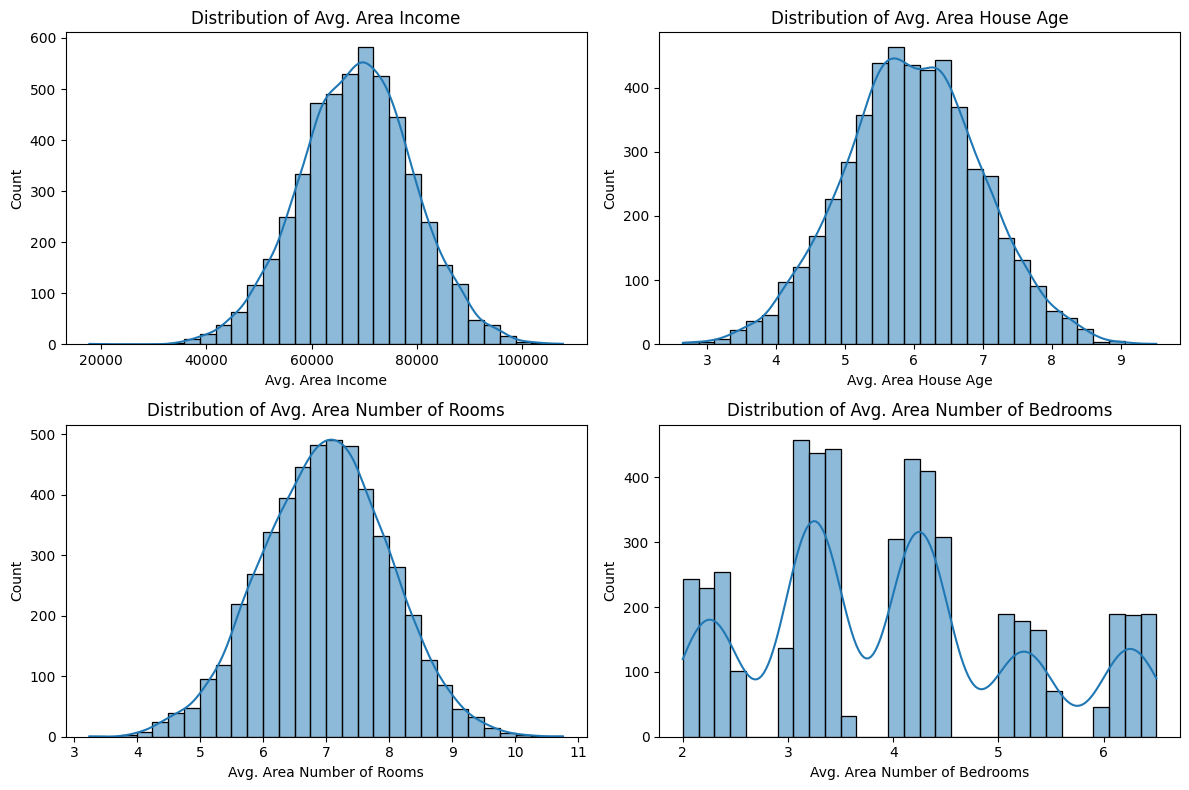

In [ ]:
#Histogram
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Avg. Area Income'], bins=30, kde=True)
plt.title('Distribution of Avg. Area Income')

plt.subplot(2, 2, 2)
sns.histplot(df['Avg. Area House Age'], bins=30, kde=True)
plt.title('Distribution of Avg. Area House Age')

plt.subplot(2, 2, 3)
sns.histplot(df['Avg. Area Number of Rooms'], bins=30, kde=True)
plt.title('Distribution of Avg. Area Number of Rooms')

plt.subplot(2, 2, 4)
sns.histplot(df['Avg. Area Number of Bedrooms'], bins=30, kde=True)
plt.title('Distribution of Avg. Area Number of Bedrooms')

plt.tight_layout()
plt.show()

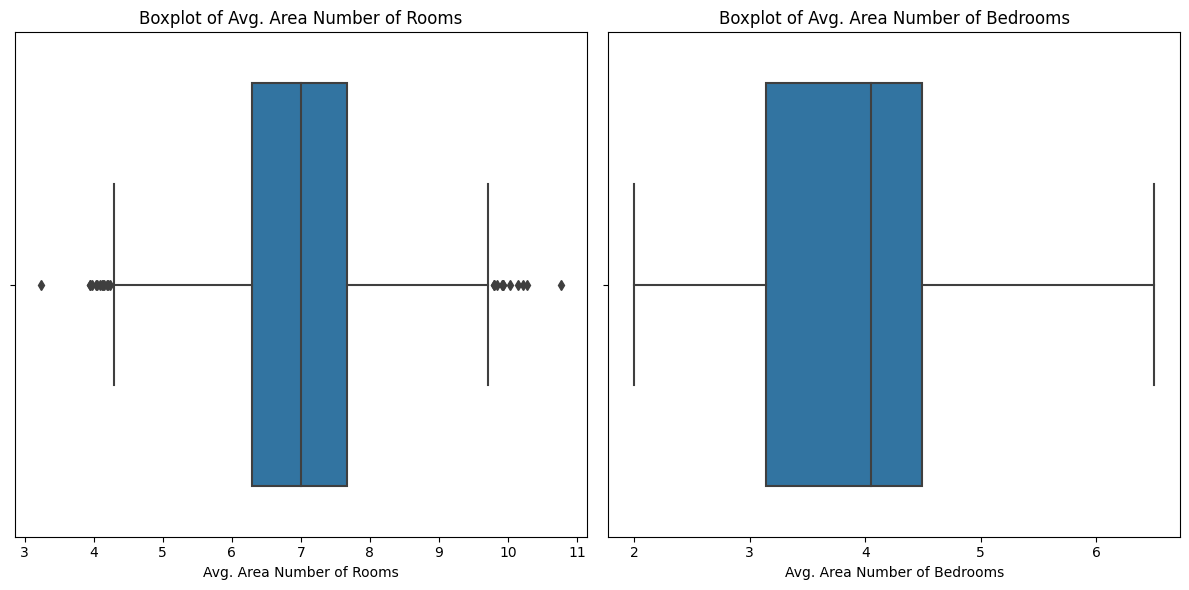

In [ ]:
#Boxplot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Avg. Area Number of Rooms', data=df)
plt.title('Boxplot of Avg. Area Number of Rooms')

plt.subplot(1, 2, 2)
sns.boxplot(x='Avg. Area Number of Bedrooms', data=df)
plt.title('Boxplot of Avg. Area Number of Bedrooms')

plt.tight_layout()
plt.show()

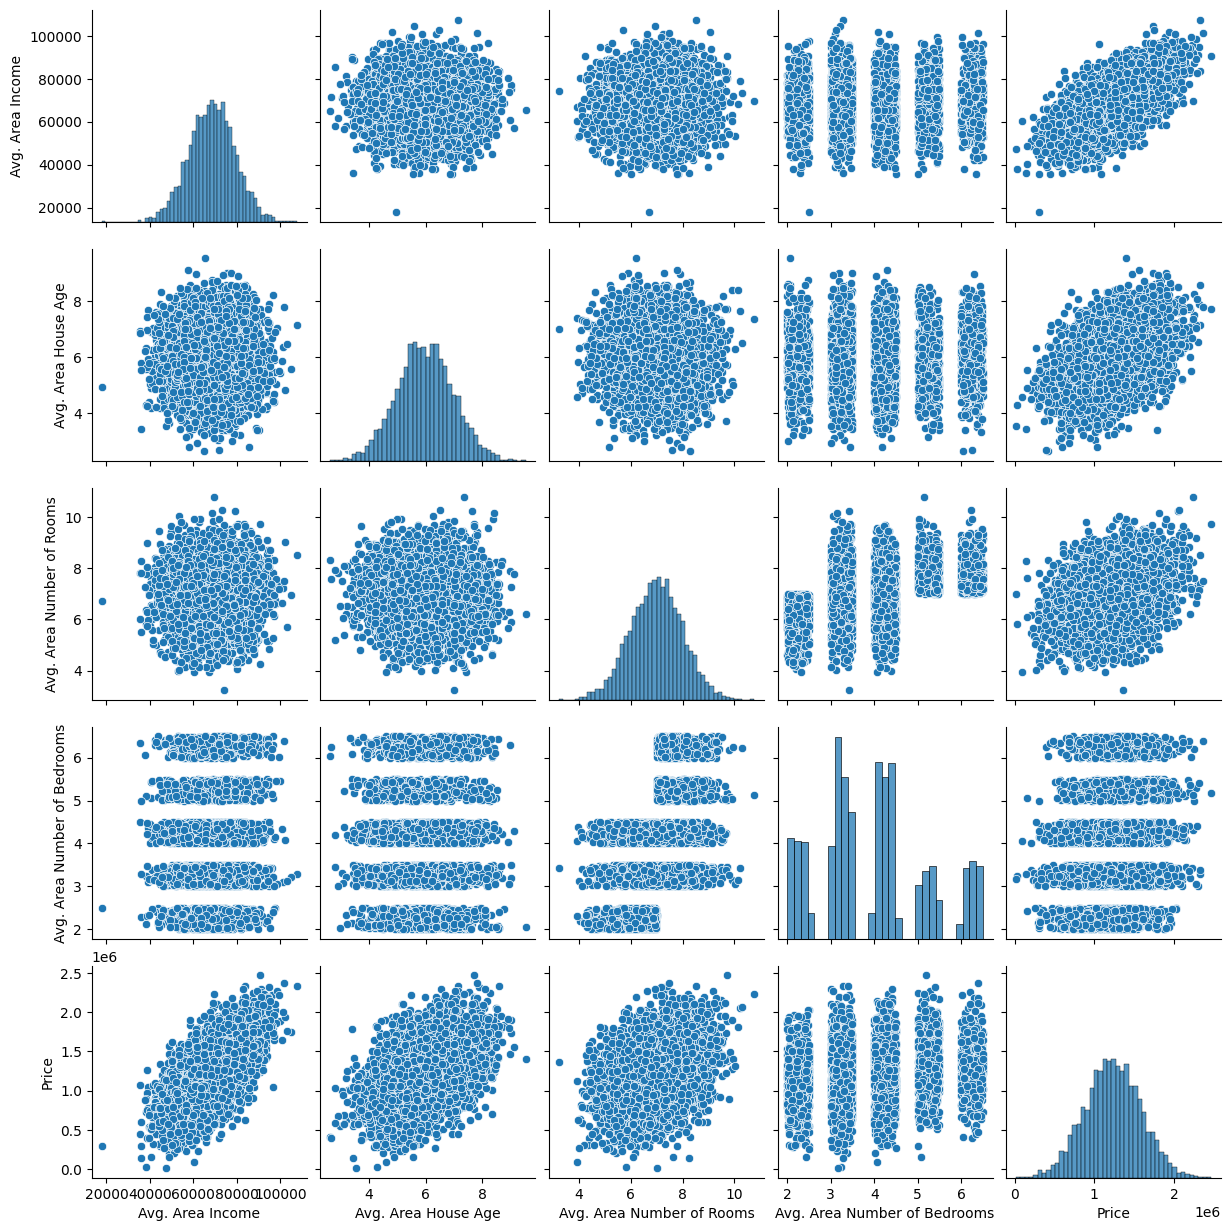

In [ ]:
#Scatterplot
sns.pairplot(df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Price']])
plt.show()

2. **Property Valuation**:

In [ ]:
features = df.drop(['Price', 'Address'], axis=1)  # Features
target = df['Price']  # Target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
#training and testing sets

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
#training the model

LinearRegression()

In [ ]:
predictions = model.predict(X_test)
#make predictions

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)**0.5)

Mean Absolute Error: 80879.0972348982
Mean Squared Error: 10089009300.894518
Root Mean Squared Error: 100444.06055558745


3. **Market Analysis**:

In [ ]:
start_date = pd.to_datetime('2020-01-01')
df['Date'] = pd.date_range(start=start_date, periods=len(df), freq='D')            #added date column for market analysis
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2020-01-01 to 2033-09-08
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 312.5+ KB


In [ ]:
# Resample the data to monthly frequency and calculate the mean price for each month
monthly_mean_prices = df['Price'].resample('M').mean()
print(monthly_mean_prices)

Date
2020-01-31    1.180898e+06
2020-02-29    1.118092e+06
2020-03-31    1.243488e+06
2020-04-30    1.235119e+06
2020-05-31    1.295542e+06
                  ...     
2033-05-31    1.213386e+06
2033-06-30    1.338807e+06
2033-07-31    1.166873e+06
2033-08-31    1.300404e+06
2033-09-30    1.240879e+06
Freq: M, Name: Price, Length: 165, dtype: float64


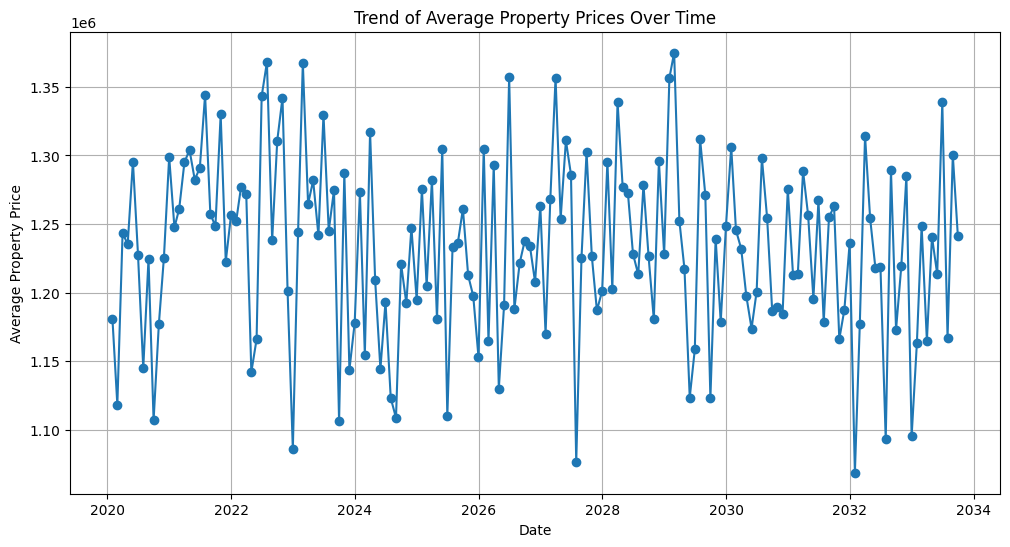

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_prices.index, monthly_mean_prices, marker='o', linestyle='-')
plt.title('Trend of Average Property Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Property Price')
plt.grid(True)
plt.show()
#plot average property price over time

4. **Feature Selection**:

In [ ]:
features = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
target = df['Price']
#selected feature and target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
#split data into training and testing

In [ ]:
#Created a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)
#fit model on training data

RandomForestRegressor(random_state=42)

In [ ]:
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})  #Create a df to display feature importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)   #Sort features by importance in descending order
print("Feature Importances:")          #Display the sorted feature importances
print(feature_importance_df)

Feature Importances:
                        Feature  Importance
0              Avg. Area Income    0.437677
1           Avg. Area House Age    0.229158
4               Area Population    0.192104
2     Avg. Area Number of Rooms    0.123387
3  Avg. Area Number of Bedrooms    0.017672


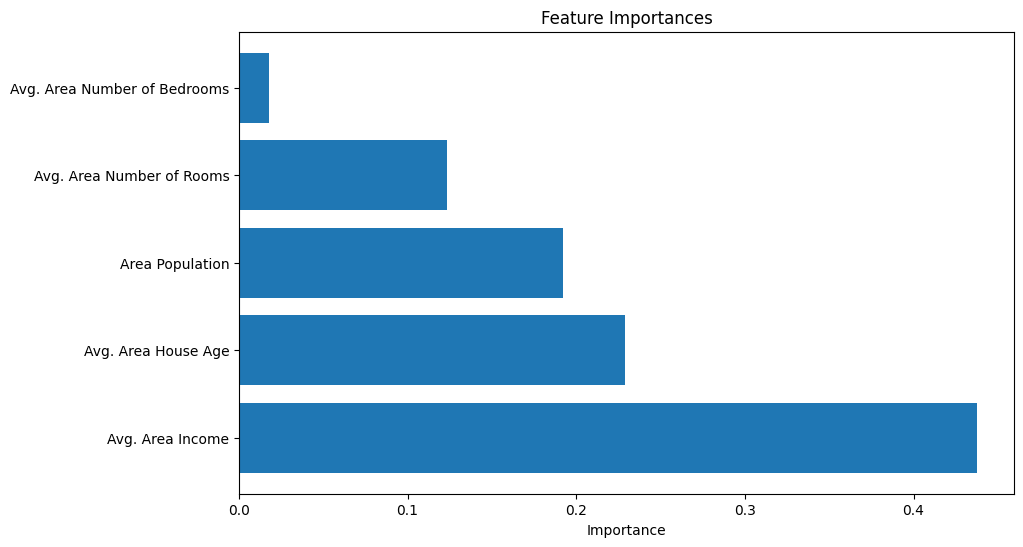

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()
#Visualisation of Features with their imortance

5. **Price Prediction**:

Mean Absolute Error: 80879.0972348982
Mean Squared Error: 10089009300.894518
R-squared Score: 0.9179971706834289


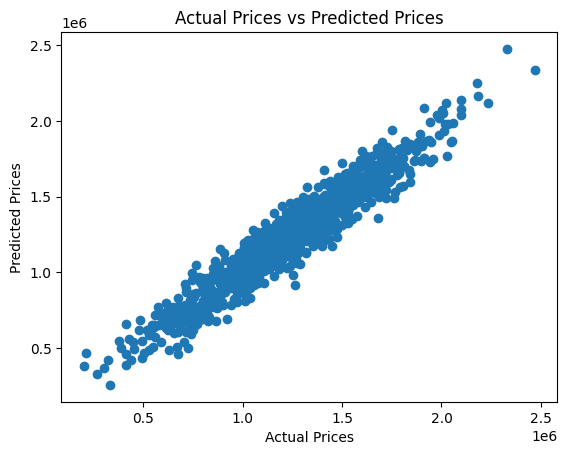

In [ ]:
features = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
target = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R-squared Score:', r2_score(y_test, predictions))

# Visualize predicted vs actual prices
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


6. **Investment Decisions**:

In [ ]:
features = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
target = df['Price']       #selecting features and target values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
#Split the data into training and testing

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)        #create random forest regressor model

In [ ]:
# Fit the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
predictions = model.predict(features)       #make predictions on datasets

In [ ]:
df['Predicted_Price'] = predictions   #Add predicted prices to the dataframe
df['Price_Appreciation'] = df['Predicted_Price'] - df['Price']      #Calculate the price appreciation
appreciating_areas = df[df['Price_Appreciation'] > 0]       #Identify areas with potential for property value appreciation

In [ ]:
# Display the top appreciating areas
top_appreciating_areas = appreciating_areas.nlargest(10, 'Price_Appreciation')[['Address', 'Price_Appreciation']]
print("Top 10 Areas with Potential for Property Value Appreciation:")
print(top_appreciating_areas)

Top 10 Areas with Potential for Property Value Appreciation:
                                                      Address  \
Date                                                            
2022-12-10              584 Rick Cove\nLeeberg, ND 15540-8557   
2020-01-24  9003 Jay Plains Suite 838\nLake Elizabeth, IN ...   
2024-04-27      707 Richard Unions\nLarsonstad, OR 98013-1254   
2024-01-31       1470 Angela Bridge\nTaylorton, DE 05823-8649   
2024-12-12      0995 Olivia Land Apt. 728\nAlexport, CA 92200   
2030-09-27  441 Ryan Courts Suite 717\nGonzalesport, NV 30350   
2026-12-02  7732 Renee Club Apt. 931\nFordland, FL 74775-2546   
2032-10-28  166 Albert Radial\nNorth Michelleville, NJ 098...   
2032-11-28     9495 Arias Valley Apt. 493\nPaulberg, WA 71154   
2023-05-29          810 Stacey Causeway\nJeremytown, NV 90167   

            Price_Appreciation  
Date                            
2022-12-10       396257.067743  
2020-01-24       360034.245068  
2024-04-27       352672.82